In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
from numpy.random import seed
seed(42)

tf.random.set_seed(42)

In [3]:
!gdown "1go6Lii8Jrwros7z_zHdAMVgZ2TGIybYJ"
!unzip "/content/UnicoTeste.zip" -d "/content"
!rm -rf '/content/UnicoTeste.zip'

Downloading...
From: https://drive.google.com/uc?id=1go6Lii8Jrwros7z_zHdAMVgZ2TGIybYJ
To: /content/UnicoTeste.zip
100% 73.9M/73.9M [00:00<00:00, 230MB/s]
Archive:  /content/UnicoTeste.zip
replace /content/Labels.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Labels.npy     
  inflating: /content/Signals.npy    


In [17]:
x_train = np.load('Signals.npy')

y_train = np.load('Labels.npy')

In [18]:
x_train.shape

(61699, 256, 20)

In [19]:
nomes = np.array(['Fp1','Fp2','F3','F4','F7','F8','T3','T4','C3','C4','T5','T6','P3','P4','O1','O2','Fz','Cz','Pz','A2-A1','ECG','State'])
print(nomes[[0,4,13,18]])

['Fp1' 'F7' 'P4' 'Pz']


In [20]:
x_train = x_train[:,:,[0,4,13,18]]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [22]:
sig = layers.Input((X_train.shape[1],X_train.shape[2]))

In [46]:
model_lstm = tf.keras.Sequential([
    layers.BatchNormalization(input_shape=(X_train.shape[1],X_train.shape[2])),
    layers.LSTM(20, return_sequences=True),
    layers.Dropout(.2),
    layers.LSTM(10, return_sequences=True),
    layers.Dropout(.2),
    layers.Flatten(),
    layers.Dense(2,activation='relu'),
    layers.Dense(units=1,activation='sigmoid')
])

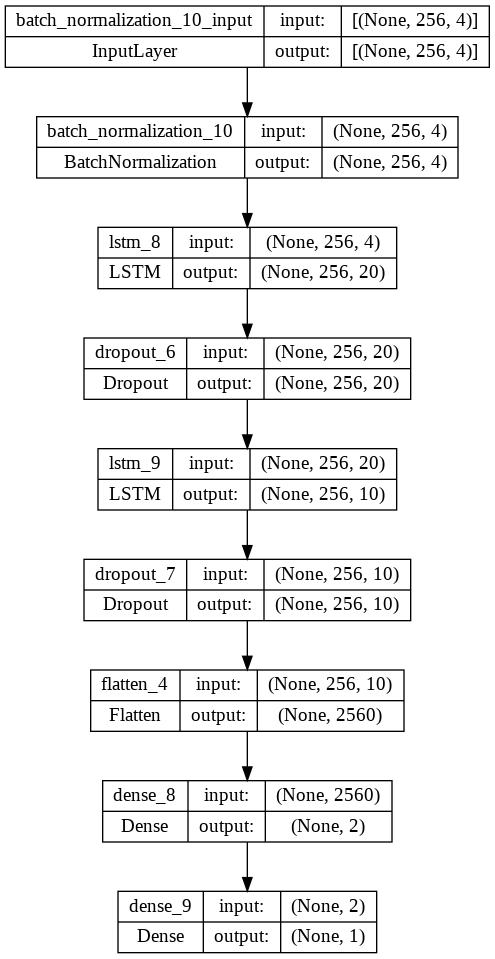

In [47]:
tf.keras.utils.plot_model(model_lstm, show_shapes=True, expand_nested=True)

In [48]:
print(model_lstm.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 256, 4)           16        
 chNormalization)                                                
                                                                 
 lstm_8 (LSTM)               (None, 256, 20)           2000      
                                                                 
 dropout_6 (Dropout)         (None, 256, 20)           0         
                                                                 
 lstm_9 (LSTM)               (None, 256, 10)           1240      
                                                                 
 dropout_7 (Dropout)         (None, 256, 10)           0         
                                                                 
 flatten_4 (Flatten)         (None, 2560)              0         
                                                      

In [49]:
tb_lstm = tf.keras.callbacks.TensorBoard(log_dir="logs/LSTM")

In [50]:
model_lstm.compile(optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [51]:
epocas = 10

In [52]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=epocas, callbacks=[tb_lstm], validation_split = 0.2,
    batch_size = 32)

Epoch 1/10
1234/1234 [==============================] - 31s 23ms/step - loss: 0.5465 - accuracy: 0.7674 - val_loss: 0.5386 - val_accuracy: 0.7706
Epoch 2/10
1234/1234 [==============================] - 28s 23ms/step - loss: 0.5438 - accuracy: 0.7675 - val_loss: 0.5387 - val_accuracy: 0.7706
Epoch 3/10
1234/1234 [==============================] - 28s 22ms/step - loss: 0.5434 - accuracy: 0.7675 - val_loss: 0.5393 - val_accuracy: 0.7706
Epoch 4/10
1234/1234 [==============================] - 25s 20ms/step - loss: 0.5434 - accuracy: 0.7675 - val_loss: 0.5387 - val_accuracy: 0.7706
Epoch 5/10
1234/1234 [==============================] - 25s 20ms/step - loss: 0.5429 - accuracy: 0.7675 - val_loss: 0.5412 - val_accuracy: 0.7706
Epoch 6/10
1234/1234 [==============================] - 27s 22ms/step - loss: 0.5430 - accuracy: 0.7675 - val_loss: 0.5386 - val_accuracy: 0.7706
Epoch 7/10
1234/1234 [==============================] - 25s 21ms/step - loss: 0.5430 - accuracy: 0.7675 - val_loss: 0.5397 -

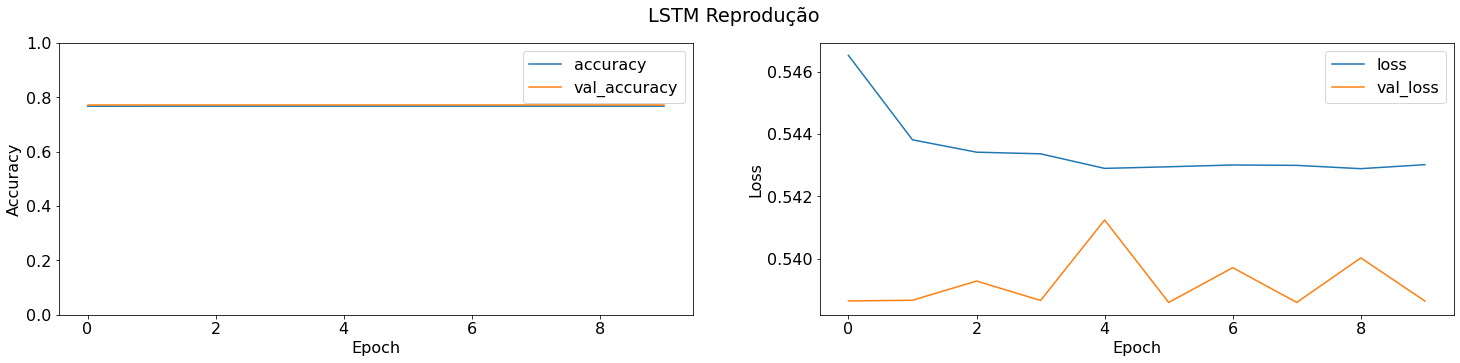

In [53]:
fig,axs = plt.subplots(1,2,figsize=(25,5))
fig.suptitle('LSTM Reprodução')
plt.rcParams['font.size'] = '16'

axs[0].plot(history_lstm.history['accuracy'], label='accuracy')
axs[0].plot(history_lstm.history['val_accuracy'], label='val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim([0,1])
axs[0].legend(loc='upper right')

axs[1].plot(history_lstm.history['loss'], label='loss')
axs[1].plot(history_lstm.history['val_loss'], label='val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')

386/386 [==============================] - 4s 9ms/step


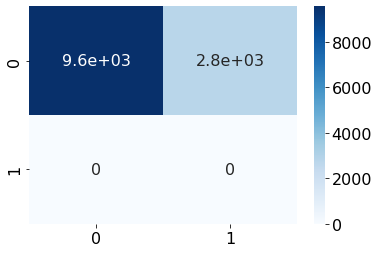

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_lstm.predict(X_test)
y_pred = y_pred[:,0]
for idx, pred in enumerate(y_pred):
  y_pred[idx] = 1 if pred>0.5 else 0


cf_matrix = confusion_matrix(y_pred, y_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')